# Introduction

Gini impurity measure is one of the methods used in decision tree algorithms to decide the optimal split from a root node, and subsequent splits.

To put it into context, recall that a decision tree is trying to create sequential questions such that it partitions the data into smaller groups. Once the partiton is complete a predictive decision is made at this terminal node (based on a frequency).

\begin{equation*}
\begin{vmatrix}
\mathbf{Obs} & \mathbf{Emotion} & \mathbf{Temperature} & \mathbf{Stay Home?} \\
1 & Sick & Temp 98  & N \\
2 & Sick & Temp 105  & Y \\
3 & Not Sick & Temp 98  & Y \\
4& Not Sick & Temp 98  & N \\
5 & Not Sick & Temp 101  & Y \\
6 & Sick & Temp 101   & N \\
7 & Not Sick & Temp 99.5  & N \\
8 & Not Sick & Temp 102  & Y \\
\end{vmatrix}
\end{equation*}

Suppose we have a list of observations, which tells if a person decided to stay home from work. We also have two features, namely if they are sick and their temperature.

We need to choose which feature, emotion or temperature, to split the data on. A Gini Impurity measure will help us make this decision.

**Def:** Gini Impurity tells us what is the probability of misclassifying an observation, using the distribution from the split, from a random sample conditional on our split.

Note that the lower the Gini the better the split. In otherwords the lower likelihood of misclassification.

# Formal Definition

The above chart is a two class problem. We will generalize it later to a n class problem.

Let **Ginx** represent the gini index.
\begin{equation*}
Ginx = p_1 \cdot (1-p_1) + p_2 \cdot (1-p_2)\\
equivalently,\\
Ginx = 2 \cdot p_1 p_2
\end{equation*}

where $ p_1$,$p_2$ are Class 1,2 probabilities, respectively.

**Note**: $p_1 + p_2 = 1$ 

This is not complete yet. The equation above will give us the gini impurity measure for a sub split, but we would like to know the gini impurity measure for the entire split. Therefore, we will need to weigh them accordingly.

\begin{equation*}
Weighted Ginx = P_L \cdot (2 \cdot p_{L1} p_{L2}) + P_R \cdot (2 \cdot p_{R1} p_{R2})
\end{equation*}

Where $P_L$ is the proportion of the split and $p_{L1}$ is anagolous to $p_1$ for the left split (same for $P_R$)

In [105]:
def Ginx(P1,P2):
    #P1 and P2 are the counts for each class after the split
    denom = P1 + P2
    Ginx = 2 * (P1/denom) * (P2/denom)
    return(Ginx)

def Wght_Ginx(G1,G2,PL,PR):
    # G1 G2 are the gini impurity for each split, and PL PR are the proportion of the split
    WG = PL * G1 + PR * G2
    return(WG)

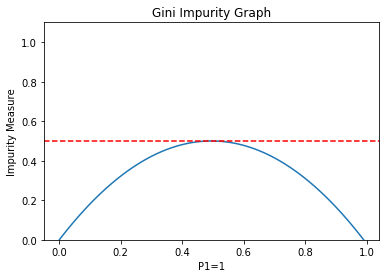

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
X=np.arange(0.0,1.0,0.01)
Y=X[::-1]

Gini=Ginx(X,Y)
plt.plot(X,Gini)
plt.axhline(y=0.5,color='r',linestyle='--')
plt.title('Gini Impurity Graph')
plt.xlabel('P1=1')
plt.ylabel('Impurity Measure')
plt.ylim([0,1.1])
plt.show()

We have a lower bound of zero and an upper bound of one half. The lower the impurity measure the better the split is.

## Example

Lets go back to our example above and split on both features.

#### Emotion

Sick Gini impurity = $2 \cdot (\frac{2}{3}) \cdot (\frac{1}{3}) = 0.444$

NotSick Gini Impurity = $2 \cdot (\frac{3}{5}) \cdot (\frac{2}{5}) = 0.48$ 

Weighted Gini Split = $ (\frac{3}{8}) \cdot Sick Gini + (\frac{5}{8}) \cdot NotSick Gini = 0.4665$

#### Temperature
We are going to hard code the threshold of temperature as Temp $\geq$ 100.

Temp over impurity = $2 \cdot (\frac{3}{4}) \cdot (\frac{1}{4}) = 0.375$

Temp under Impurity = $2 \cdot (\frac{3}{4}) \cdot (\frac{1}{4}) = 0.375$ 

Weighted Gini Split = $ (\frac{4}{8}) \cdot Temp Over Gini + (\frac{4}{8}) \cdot Temp Under Gini = 0.375$

We can see that Temperature has a lower Gini Measure. Therefore we would choose to split on Temperature, because it has the lowest probability of misclassifying the observation.

In [109]:
# Create Sample 
Emotion=['sick','sick','notsick','notsick','notsick','sick','notsick','notsick']
Temperature = ['under','over','under','under','over','over','under','over']
StayHome=['N','Y','Y','N','Y','N','N','Y']
df=pd.DataFrame (list(zip(Emotion,Temperature,StayHome)),
                columns=["Emotion","Temperature","StayHome"])
#sort it by Emotion
df.sort_values(['Emotion'],inplace=True)
print(df)

   Emotion Temperature StayHome
2  notsick       under        Y
3  notsick       under        N
4  notsick        over        Y
6  notsick       under        N
7  notsick        over        Y
0     sick       under        N
1     sick        over        Y
5     sick        over        N


We will verify that our function Gini does return the values we have above.

In [108]:
a=Ginx(2,1)
print("Sick Gini Impurity:",a)
b=Ginx(3,2)
print("Not Sick gini impurity:",b)

Sick Gini Impurity: 0.4444444444444444
Not Sick gini impurity: 0.48


# Appendix

### Generalization of Gini Impurity

Suppose we have $n$ different classes. Then the Gini formula will be :

$Ginx = p_1 \cdot (1-p_1) + p_2 \cdot (1-p_2)+ ...+ p_n \cdot (1-p_n)$

where, $\sum_{n}^{i=1} p_i = 1$ which is equivalent to $\sum_{j \ne i} p_j = 1-p_i$


Therefore 

$Ginx = \sum_{n}^{i=1} p_i \cdot \sum_{i \ne j} \cdot p_i = \sum_{n}^{i=1} p_i \cdot (1-p_i)$

####  <font color='red'>Try and write a function that will represent the generalized Gini Impurity measure:</font> 